In [1]:
import pandas as pd  

df_new = pd.read_csv('/Users/krishnaaa/Downloads/final-dataset (2).csv')  
display(df_new)

,repo,stars,forks,pull_requests,pScore,pScore_normalized,popular,s_num_nodes,s_weighted_mean_degree,s_num_component,...,t_num_dev_nodes,t_num_file_nodes,t_num_dev_per_file,t_num_file_per_dev,t_graph_density,proj_name,month,st_num_dev,t_net_overlap,s_net_overlap
0,echarts,62125,19696,30,82721,1.000000,1,4,5.000000,1,...,4,535,1.220561,163.250000,0.305140,echarts,0,0,0.000000,0.000000
1,echarts,62125,19696,30,82721,1.000000,1,5,4.800000,2,...,4,414,1.881643,194.750000,0.470411,echarts,1,0,0.064156,0.000000
2,echarts,62125,19696,30,82721,1.000000,1,6,9.333333,1,...,3,606,1.110561,224.333333,0.370187,echarts,2,0,0.017894,0.222222
3,echarts,62125,19696,30,82721,1.000000,1,8,28.000000,1,...,2,510,1.039216,265.000000,0.519608,echarts,3,0,0.025705,0.250000
4,echarts,62125,19696,30,82721,1.000000,1,7,11.428571,1,...,3,60,1.500000,30.000000,0.500000,echarts,4,0,0.057878,0.291667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5506,amaterasu,0,1,0,1,0.000012,0,3,4.000000,1,...,0,0,0.000000,0.000000,0.000000,amaterasu,19,0,0.000000,0.200000
5507,amaterasu,0,1,0,1,0.000012,0,0,0.000000,0,...,2,46,1.043478,24.000000,0.521739,amaterasu,20,0,0.000000,0.000000
5508,amaterasu,0,1,0,1,0.000012,0,3,5.333333,1,...,1,3,1.000000,3.000000,1.000000,amaterasu,21,0,0.000000,0.000000
5509,amaterasu,0,1,0,1,0.000012,0,2,2.000000,1,...,0,0,0.000000,0.000000,0.000000,amaterasu,22,0,0.000000,0.000000


In [7]:
metrics_to_smooth = ['s_num_nodes', 's_weighted_mean_degree',
       's_num_component', 's_avg_clustering_coef', 's_largest_component',
       's_graph_density', 't_num_dev_nodes', 't_num_file_nodes',
       't_num_dev_per_file', 't_num_file_per_dev', 't_graph_density',
       'st_num_dev', 't_net_overlap', 's_net_overlap']

for metric in metrics_to_smooth:
    df_new[f'{metric}_rm'] = df_new.groupby('proj_name')[metric].transform(
        lambda x: x.rolling(window=12, min_periods=1).mean()
    )

df_final = df_new.sort_values(['proj_name', 'month']).groupby('proj_name').last().reset_index()

In [9]:
print(df_final.columns)


Index(['proj_name', 'repo', 'stars', 'forks', 'pull_requests', 'pScore',
       'pScore_normalized', 'popular', 's_num_nodes', 's_weighted_mean_degree',
       's_num_component', 's_avg_clustering_coef', 's_largest_component',
       's_graph_density', 't_num_dev_nodes', 't_num_file_nodes',
       't_num_dev_per_file', 't_num_file_per_dev', 't_graph_density', 'month',
       'st_num_dev', 't_net_overlap', 's_net_overlap', 's_num_nodes_rm',
       's_weighted_mean_degree_rm', 's_num_component_rm',
       's_avg_clustering_coef_rm', 's_largest_component_rm',
       's_graph_density_rm', 't_num_dev_nodes_rm', 't_num_file_nodes_rm',
       't_num_dev_per_file_rm', 't_num_file_per_dev_rm', 't_graph_density_rm',
       'st_num_dev_rm', 't_net_overlap_rm', 's_net_overlap_rm'],
      dtype='object')


In [87]:
df_final

,proj_name,repo,stars,forks,pull_requests,pScore,pScore_normalized,popular,s_num_nodes,s_weighted_mean_degree,...,s_weighted_mean_degree_rm_rm,s_num_component_rm_rm,t_num_dev_nodes_rm_rm,t_num_file_nodes_rm_rm,t_num_dev_per_file_rm_rm,t_num_file_per_dev_rm_rm,t_graph_density_rm_rm,st_num_dev_rm_rm,t_net_overlap_rm_rm,s_net_overlap_rm_rm
0,abdera,abdera,18,24,4,58,0.000701,0,12,6.000000,...,15.664806,1.458333,1.861111,110.756944,1.036619,68.782407,0.651117,0.458333,0.107363,0.133989
1,accumulo,accumulo,1091,455,30,2446,0.029569,1,72,14.111111,...,17.902995,1.266667,4.786111,283.752778,1.274658,77.472560,0.271063,2.730556,0.043665,0.066885
2,ace,ace,27,23,16,306,0.003699,0,36,14.777778,...,8.525395,1.534722,1.736111,19.631944,1.039270,12.431713,0.683774,0.895833,0.045250,0.057097
3,activemq,activemq,2345,1455,30,4700,0.056817,1,138,27.971014,...,12.878268,2.661045,7.953277,639.371263,1.138223,94.930752,0.145484,4.779663,0.098313,0.087731
4,airavata,airavata,119,126,30,1145,0.013842,1,30,19.466667,...,14.422675,1.680017,5.016261,228.688023,1.157351,56.913788,0.297188,3.910008,0.067264,0.133316
5,airflow,airflow,39190,14797,30,54887,0.663520,1,51,11.372549,...,11.409801,2.763889,30.812500,160.576389,1.377217,12.368841,0.067271,4.451389,0.040908,0.073983
6,allura,allura,133,35,8,232,0.002805,0,19,28.210526,...,11.171973,1.099242,8.887374,167.493981,1.701022,31.507239,0.199824,2.704588,0.156929,0.121961
7,amaterasu,amaterasu,0,1,0,1,0.000012,0,0,0.000000,...,5.684039,0.819444,0.986111,110.180556,0.720756,59.993056,0.561767,0.576389,0.047211,0.098854
8,ambari,ambari,2182,1698,30,4780,0.057785,1,34,9.058824,...,8.761353,2.041667,5.750000,376.583333,1.098504,89.016853,0.233626,3.208333,0.111850,0.076447
9,ant,ant,432,441,30,1773,0.021433,1,22,4.909091,...,6.670990,7.902778,3.694444,75.597222,1.041519,21.861806,0.339057,2.750000,0.036476,0.034425


In [11]:
columns_to_drop = [
    's_num_nodes', 's_weighted_mean_degree',
       's_num_component', 's_avg_clustering_coef', 's_largest_component',
       's_graph_density', 't_num_dev_nodes', 't_num_file_nodes',
       't_num_dev_per_file', 't_num_file_per_dev', 't_graph_density', 'month',
       'st_num_dev', 't_net_overlap', 's_net_overlap']

df_final = df_final.drop(columns=columns_to_drop, errors='ignore')

df_final


,proj_name,repo,stars,forks,pull_requests,pScore,pScore_normalized,popular,s_num_nodes_rm,s_weighted_mean_degree_rm,...,s_largest_component_rm,s_graph_density_rm,t_num_dev_nodes_rm,t_num_file_nodes_rm,t_num_dev_per_file_rm,t_num_file_per_dev_rm,t_graph_density_rm,st_num_dev_rm,t_net_overlap_rm,s_net_overlap_rm
0,abdera,abdera,18,24,4,58,0.000701,0,21.416667,12.664025,...,19.083333,0.125254,1.833333,75.500000,1.038744,41.444444,0.657746,0.500000,0.085049,0.102790
1,accumulo,accumulo,1091,455,30,2446,0.029569,1,55.666667,17.447138,...,51.833333,0.127572,5.166667,267.333333,1.300772,68.473413,0.260932,3.333333,0.060005,0.108591
2,ace,ace,27,23,16,306,0.003699,0,13.916667,9.551163,...,10.250000,0.185207,2.000000,18.833333,1.059696,10.180556,0.608561,1.000000,0.064841,0.075501
3,activemq,activemq,2345,1455,30,4700,0.056817,1,125.416667,16.388219,...,111.416667,0.030622,8.166667,637.916667,1.111529,90.547421,0.138677,5.416667,0.113733,0.085538
4,airavata,airavata,119,126,30,1145,0.013842,1,31.416667,15.121503,...,23.250000,0.104979,4.833333,179.916667,1.149915,43.699206,0.248192,4.333333,0.088845,0.149666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,wookie,wookie,6,5,15,236,0.002853,0,13.000000,10.039947,...,10.500000,0.253916,2.583333,33.833333,0.928931,12.868056,0.319815,2.250000,0.040040,0.130081
235,yoko,yoko,3,13,2,20,0.000242,0,12.583333,8.566798,...,9.833333,0.243695,3.500000,64.333333,1.062763,19.008333,0.420675,0.583333,0.091210,0.068341
236,zeppelin,zeppelin,6468,2816,30,10184,0.123113,1,110.583333,16.686668,...,107.500000,0.033286,17.750000,121.583333,1.314499,8.704715,0.090055,6.833333,0.085819,0.087676
237,zeta,zeta,47,14,4,77,0.000931,0,9.833333,5.669462,...,6.250000,0.252261,0.583333,15.333333,0.500000,14.833333,0.458333,0.333333,0.000000,0.040706


In [21]:
print(df_final.columns)


Index(['proj_name', 'repo', 'stars', 'forks', 'pull_requests', 'pScore',
       'pScore_normalized', 'popular', 's_num_nodes_rm',
       's_weighted_mean_degree_rm', 's_num_component_rm',
       's_avg_clustering_coef_rm', 's_largest_component_rm',
       's_graph_density_rm', 't_num_dev_nodes_rm', 't_num_file_nodes_rm',
       't_num_dev_per_file_rm', 't_num_file_per_dev_rm', 't_graph_density_rm',
       'st_num_dev_rm', 't_net_overlap_rm', 's_net_overlap_rm'],
      dtype='object')


In [ ]:
mean_value = df_final['t_num_file_per_dev_rm'].mean()
median_value = df_final['t_num_file_per_dev_rm'].median()
print(f"Mean: {mean_value}, Median: {median_value}")


print(df_final['t_num_file_per_dev_rm'].nlargest(5))  
print(df_final['t_num_file_per_dev_rm'].nsmallest(5)) 

In [73]:
mean_value = df_final['t_num_file_nodes_rm'].mean()
median_value = df_final['t_num_file_nodes_rm'].median()
print(f"Mean: {mean_value}, Median: {median_value}")

Mean: 303.08502584119736, Median: 118.33333333333333


In [ ]:
t_num_file_nodes_rm          303.085026


In [81]:
print(df_final.columns)
print(df_new.columns)


Index(['proj_name', 'repo', 'stars', 'forks', 'pull_requests', 'pScore',
       'pScore_normalized', 'popular', 's_num_nodes_rm',
       's_weighted_mean_degree_rm', 's_num_component_rm', 't_num_dev_nodes_rm',
       't_num_file_nodes_rm', 't_num_dev_per_file_rm', 't_num_file_per_dev_rm',
       't_graph_density_rm', 'st_num_dev_rm', 't_net_overlap_rm',
       's_net_overlap_rm'],
      dtype='object')
Index(['repo', 'stars', 'forks', 'pull_requests', 'pScore',
       'pScore_normalized', 'popular', 's_num_nodes', 's_weighted_mean_degree',
       's_num_component', 's_avg_clustering_coef', 's_largest_component',
       's_graph_density', 't_num_dev_nodes', 't_num_file_nodes',
       't_num_dev_per_file', 't_num_file_per_dev', 't_graph_density',
       'proj_name', 'month', 'st_num_dev', 't_net_overlap', 's_net_overlap',
       's_num_nodes_rm', 's_weighted_mean_degree_rm', 's_num_component_rm',
       't_num_dev_nodes_rm', 't_num_file_nodes_rm', 't_num_dev_per_file_rm',
       't_num_f

In [15]:
most_popular_project = df_final.loc[df_final['pScore'].idxmax()]
most_popular_project

proj_name                       echarts
repo                            echarts
stars                             62125
forks                             19696
pull_requests                        30
pScore                            82721
pScore_normalized                   1.0
popular                               1
s_num_nodes_rm                16.166667
s_weighted_mean_degree_rm      6.624307
s_num_component_rm             1.916667
s_avg_clustering_coef_rm       0.132352
s_largest_component_rm            14.25
s_graph_density_rm              0.14938
t_num_dev_nodes_rm                  8.0
t_num_file_nodes_rm          379.833333
t_num_dev_per_file_rm          1.348528
t_num_file_per_dev_rm         63.653923
t_graph_density_rm             0.142345
st_num_dev_rm                       1.5
t_net_overlap_rm               0.104762
s_net_overlap_rm               0.122829
Name: 63, dtype: object

In [25]:
median_values = df_final[[
   's_num_nodes_rm',
       's_weighted_mean_degree_rm', 's_num_component_rm',
       's_avg_clustering_coef_rm', 's_largest_component_rm',
       's_graph_density_rm', 't_num_dev_nodes_rm', 't_num_file_nodes_rm',
       't_num_dev_per_file_rm', 't_num_file_per_dev_rm', 't_graph_density_rm',
       'st_num_dev_rm', 't_net_overlap_rm', 's_net_overlap_rm']].median()

print(median_values)


s_num_nodes_rm                18.000000
s_weighted_mean_degree_rm     14.289715
s_num_component_rm             1.500000
s_avg_clustering_coef_rm       0.235124
s_largest_component_rm        15.333333
s_graph_density_rm             0.170925
t_num_dev_nodes_rm             3.500000
t_num_file_nodes_rm          118.333333
t_num_dev_per_file_rm          1.068898
t_num_file_per_dev_rm         32.225614
t_graph_density_rm             0.274838
st_num_dev_rm                  2.000000
t_net_overlap_rm               0.058348
s_net_overlap_rm               0.104658
dtype: float64


In [63]:
average_values = df_final[[
    's_num_nodes_rm',               
's_weighted_mean_degree_rm',      
's_num_component_rm',          
't_num_dev_nodes_rm',
't_num_file_nodes_rm',          
't_num_dev_per_file_rm',          
't_num_file_per_dev_rm',      
't_graph_density_rm',             
'st_num_dev_rm',                     
't_net_overlap_rm',               
's_net_overlap_rm' 
]].mean()

print(average_values)

s_num_nodes_rm                30.780308
s_weighted_mean_degree_rm     14.906897
s_num_component_rm             1.755777
t_num_dev_nodes_rm             5.788648
t_num_file_nodes_rm          303.085026
t_num_dev_per_file_rm          1.027483
t_num_file_per_dev_rm         56.412503
t_graph_density_rm             0.300117
st_num_dev_rm                  2.921100
t_net_overlap_rm               0.066124
s_net_overlap_rm               0.107445
dtype: float64


In [77]:
from scipy.stats import trim_mean

trim_ratio = 0.1

trimmed_mean_values = df_final[[
    's_num_nodes_rm',               
    's_weighted_mean_degree_rm',      
    's_num_component_rm',          
    't_num_dev_nodes_rm',
    't_num_file_nodes_rm',          
    't_num_dev_per_file_rm',          
    't_num_file_per_dev_rm',      
    't_graph_density_rm',             
    'st_num_dev_rm',                     
    't_net_overlap_rm',               
    's_net_overlap_rm' 
]].apply(lambda x: trim_mean(x, proportiontocut=trim_ratio))

print(trimmed_mean_values)


s_num_nodes_rm                22.841668
s_weighted_mean_degree_rm     13.904820
s_num_component_rm             1.604963
t_num_dev_nodes_rm             4.619460
t_num_file_nodes_rm          177.408584
t_num_dev_per_file_rm          1.014364
t_num_file_per_dev_rm         36.876401
t_graph_density_rm             0.286724
st_num_dev_rm                  2.326742
t_net_overlap_rm               0.061605
s_net_overlap_rm               0.106770
dtype: float64


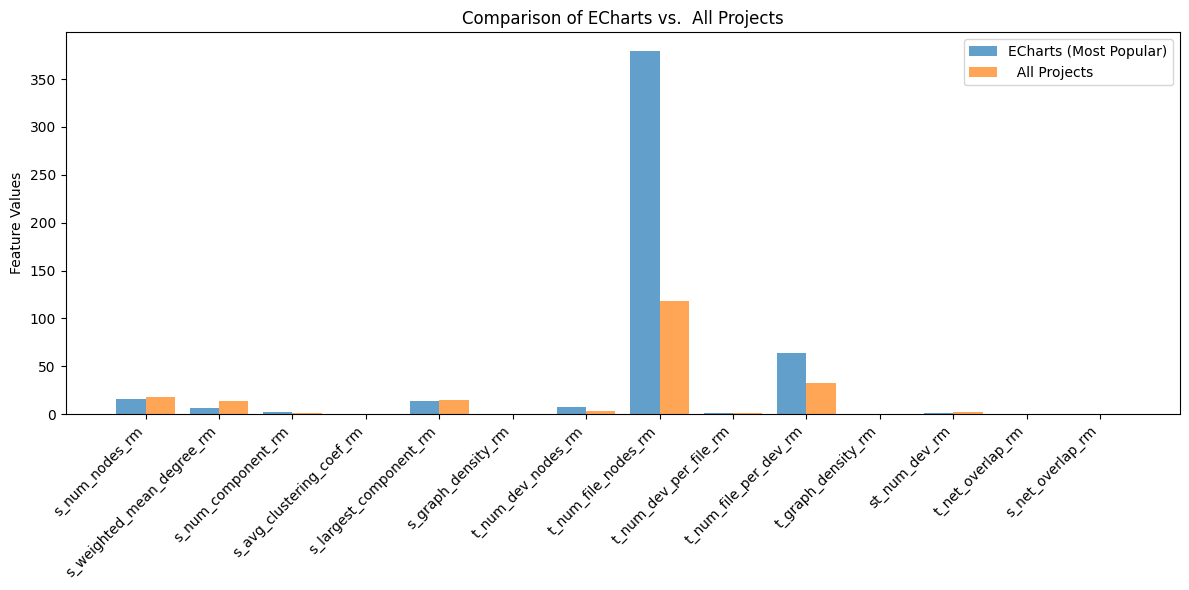

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

features = [
    's_num_nodes_rm', 's_weighted_mean_degree_rm', 's_num_component_rm',
    's_avg_clustering_coef_rm', 's_largest_component_rm', 's_graph_density_rm',
    't_num_dev_nodes_rm', 't_num_file_nodes_rm', 't_num_dev_per_file_rm',
    't_num_file_per_dev_rm', 't_graph_density_rm', 'st_num_dev_rm',
    't_net_overlap_rm', 's_net_overlap_rm'
]

echarts_values = np.array([
    16.166667,
      6.624307,
             1.916667,
       0.132352,
            14.25,
              0.14938,
                  8.0,
          379.833333,
          1.348528,
         63.653923,
             0.142345,
                       1.5,
               0.104762,
               0.122829])

median_values = np.array([
    18.000000,
    14.289715,
             1.500000,
       0.235124,
        15.333333,
             0.170925,
             3.500000,
          118.333333,
          1.068898,
         32.225614,
             0.274838,
                  2.000000,
               0.058348,
               0.104658
])

x = np.arange(len(features))  # X-axis positions

fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.4

bars1 = ax.bar(x - bar_width/2, echarts_values, bar_width, label="ECharts (Most Popular)", alpha=0.7)
bars2 = ax.bar(x + bar_width/2, median_values, bar_width, label="  All Projects", alpha=0.7)

ax.set_xticks(x)
ax.set_xticklabels(features, rotation=45, ha="right")
ax.set_ylabel("Feature Values")
ax.set_title("Comparison of ECharts vs.  All Projects")
ax.legend()
plt.tight_layout()
plt.show()


In [57]:
most_popular_project

,s_num_nodes_rm,s_weighted_mean_degree_rm,s_num_component_rm,s_avg_clustering_coef_rm,s_largest_component_rm,s_graph_density_rm,t_num_dev_nodes_rm,t_num_file_nodes_rm,t_num_dev_per_file_rm,t_num_file_per_dev_rm,t_graph_density_rm,st_num_dev_rm,t_net_overlap_rm,s_net_overlap_rm,popular
0,16.166667,6.624307,1.916667,0.132352,14.25,0.14938,8.0,379.833333,1.348528,63.653923,0.142345,1.5,0.104762,0.122829,1


In [65]:
df_median

,Feature,Median Value
0,s_num_nodes_rm,18.000000
1,s_weighted_mean_degree_rm,14.289715
2,s_num_component_rm,1.500000
3,s_avg_clustering_coef_rm,0.235124
4,s_largest_component_rm,15.333333
5,s_graph_density_rm,0.170925
6,t_num_dev_nodes_rm,3.500000
7,t_num_file_nodes_rm,118.333333
8,t_num_dev_per_file_rm,1.068898
9,t_num_file_per_dev_rm,32.225614


In [67]:
df_median = df_median.set_index("Feature") 
most_popular_project = most_popular_project.T 
most_popular_project.columns = ["Most Popular Project"]
df_median.columns = ["Median Value"]
comparison_df = pd.concat([most_popular_project, df_median], axis=1)



In [75]:
comparison_df=comparison_df.drop('popular')

In [77]:
comparison_df

,Most Popular Project,Median Value
s_num_nodes_rm,16.166667,18.000000
s_weighted_mean_degree_rm,6.624307,14.289715
s_num_component_rm,1.916667,1.500000
s_avg_clustering_coef_rm,0.132352,0.235124
s_largest_component_rm,14.250000,15.333333
s_graph_density_rm,0.149380,0.170925
t_num_dev_nodes_rm,8.000000,3.500000
t_num_file_nodes_rm,379.833333,118.333333
t_num_dev_per_file_rm,1.348528,1.068898
t_num_file_per_dev_rm,63.653923,32.225614


In [81]:
comparison_df1 = comparison_df.loc[["s_largest_component_rm", "t_num_dev_nodes_rm", "t_num_file_nodes_rm"]]
comparison_df1

,Most Popular Project,Median Value
s_largest_component_rm,14.250000,15.333333
t_num_dev_nodes_rm,8.000000,3.500000
t_num_file_nodes_rm,379.833333,118.333333
